<a href="https://colab.research.google.com/github/derivai7/PCVK_Ganjil_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

**HISTOGRAM CITRA**

<BarContainer object of 256 artists>

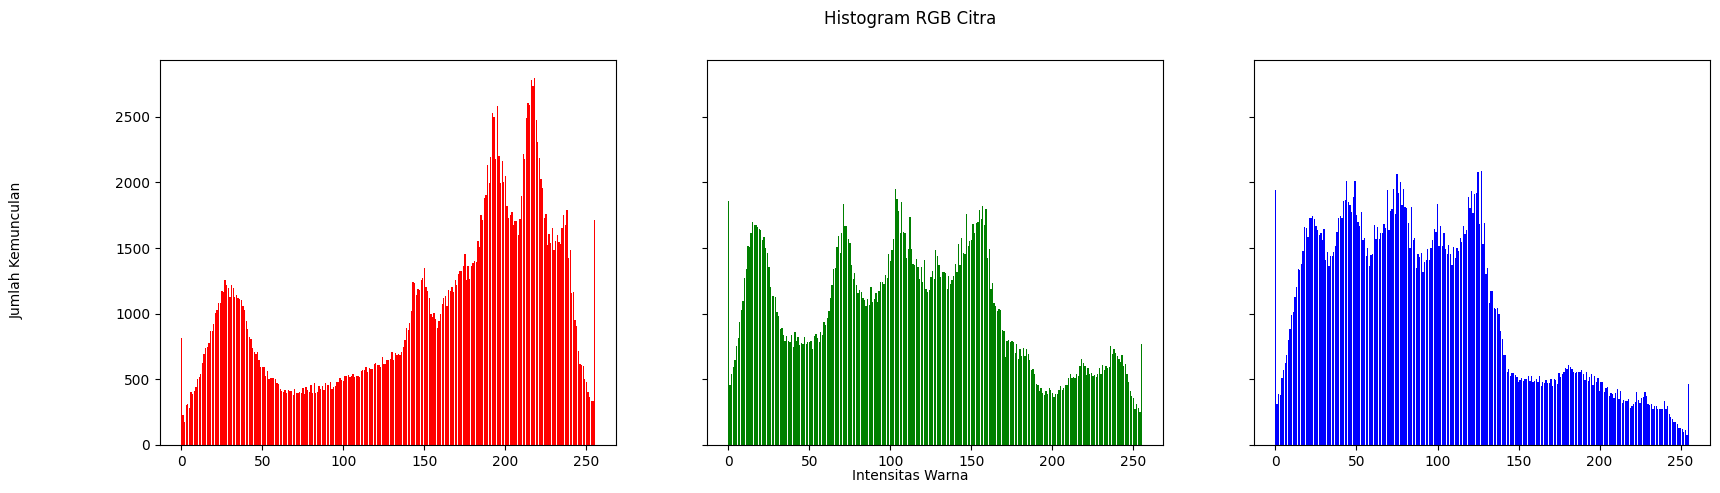

In [4]:
# Membaca citra
image = cv.imread('/content/drive/MyDrive/dataset/lena.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Mendapatkan dimensi citra
height, width, channels = image.shape

# Menginisialisasi array untuk histogram
blue_histogram = [0] * 256
green_histogram = [0] * 256
red_histogram = [0] * 256

# Menghitung histogram
for y in range(height):
    for x in range(width):
        blue_histogram[image[y, x, 0]] += 1
        green_histogram[image[y, x, 1]] += 1
        red_histogram[image[y, x, 2]] += 1

# Menyiapkan sumbu x
intensity_values = np.arange(256)

# Membuat plot histogram
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Citra')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(intensity_values, red_histogram, color='red')
axs[1].bar(intensity_values, green_histogram, color='green')
axs[2].bar(intensity_values, blue_histogram, color='blue')

**HISTOGRAM CITRA MENGGUNAKAN NUMPY HISTOGRAM**

<BarContainer object of 256 artists>

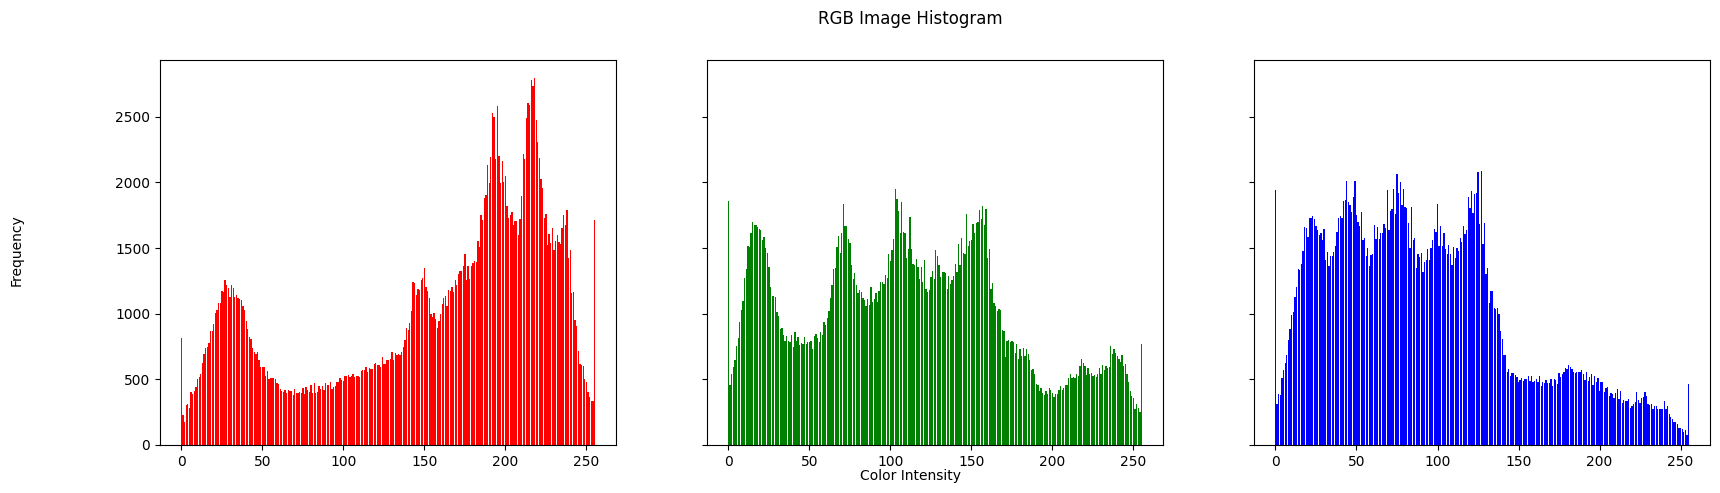

In [7]:
# Menghitung histogram menggunakan NumPy
red_histogram = np.histogram(image_rgb[:, :, 0], bins=256, range=(0, 256))
green_histogram = np.histogram(image_rgb[:, :, 1], bins=256, range=(0, 256))
blue_histogram = np.histogram(image_rgb[:, :, 2], bins=256, range=(0, 256))

# Menyiapkan sumbu x
intensity_values = np.arange(256)

# Membuat plot histogram
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('RGB Image Histogram')
fig.text(0.05, 0.5, 'Frequency', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Color Intensity', ha='center')
axs[0].bar(intensity_values, red_histogram[0], color='red')
axs[1].bar(intensity_values, green_histogram[0], color='green')
axs[2].bar(intensity_values, blue_histogram[0], color='blue')

**HISTOGRAM EQUALIZATION**

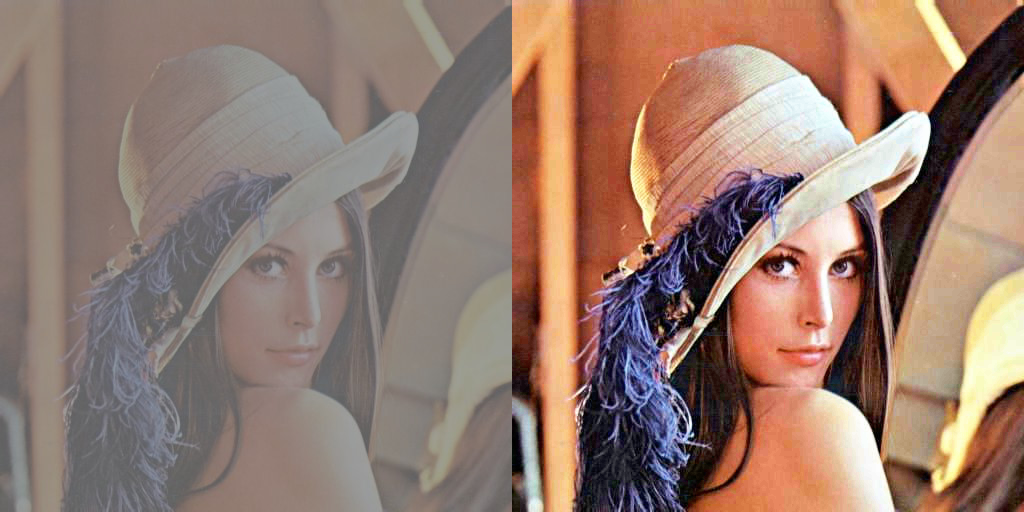

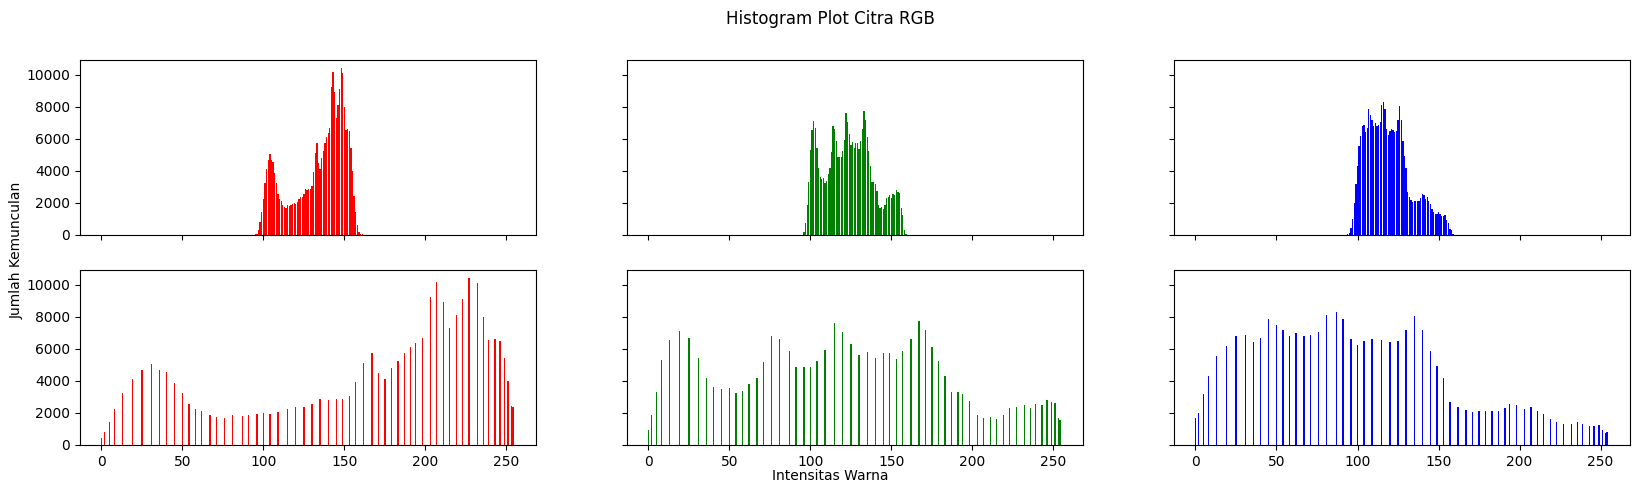

In [26]:
# Membaca citra
original_image = cv.imread('/content/drive/MyDrive/dataset/lena_lc.jpg')

def calculate_histogram(image):
    height, width, channels = np.shape(image)
    histogram = np.zeros((channels, 256))
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                histogram[c][image[y][x][c]] += 1
    return histogram

original_histogram = calculate_histogram(original_image)

# Mengkonversi ke array NumPy
image_array = np.asarray(original_image)

# Step 1: Normalized cumulative histogram
# Meratakan array citra dan menghitung histogram dengan binning
histogram_array = np.bincount(image_array.flatten(), minlength=256)

# Normalisasi
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

# Normalized cumulative histogram
cumulative_histogram_array = np.cumsum(histogram_array)

# Step 2: Lookup table transformasi pixel
transform_map = (255 * cumulative_histogram_array).astype(np.uint8)

# Step 3: Transformasi
# Meratakan array citra menjadi daftar
image_list = list(image_array.flatten())

# Transformasi nilai piksel untuk diekualisasi
equalized_image_list = [transform_map[p] for p in image_list]

# Mengubah bentuk dan menulis kembali ke dalam array citra
equalized_image_array = np.reshape(np.asarray(equalized_image_list), image_array.shape)
equalized_image = equalized_image_array

equalized_histogram = calculate_histogram(equalized_image)

# Menggabungkan citra asli dan citra hasil ekualisasi
final_image = cv.hconcat((original_image, equalized_image))  # Menggabungkan citra
cv2_imshow(final_image)

intensity_values = np.arange(256)
# Periksa apakah citra grayscale atau berwarna
if original_image.shape[-1] == 1:
    # Citra grayscale
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Plot Citra Grayscale')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(intensity_values, original_histogram[0], color='gray')
    axs[1].bar(intensity_values, equalized_histogram[0], color='gray')
else:
    # Citra berwarna
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Plot Citra RGB')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    for c in range(3):
        axs[0, c].bar(intensity_values, original_histogram[2 - c], color=['red', 'green', 'blue'][c])
        axs[1, c].bar(intensity_values, equalized_histogram[2 - c], color=['red', 'green', 'blue'][c])

**HISTOGRAM EQUALIZATION MENGUNAKAN CV EQUALIZEHIST**

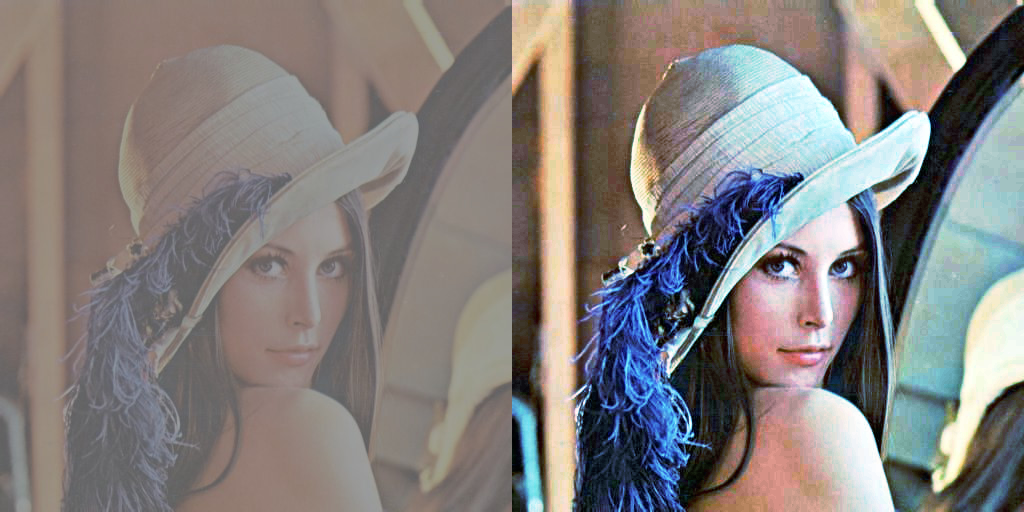

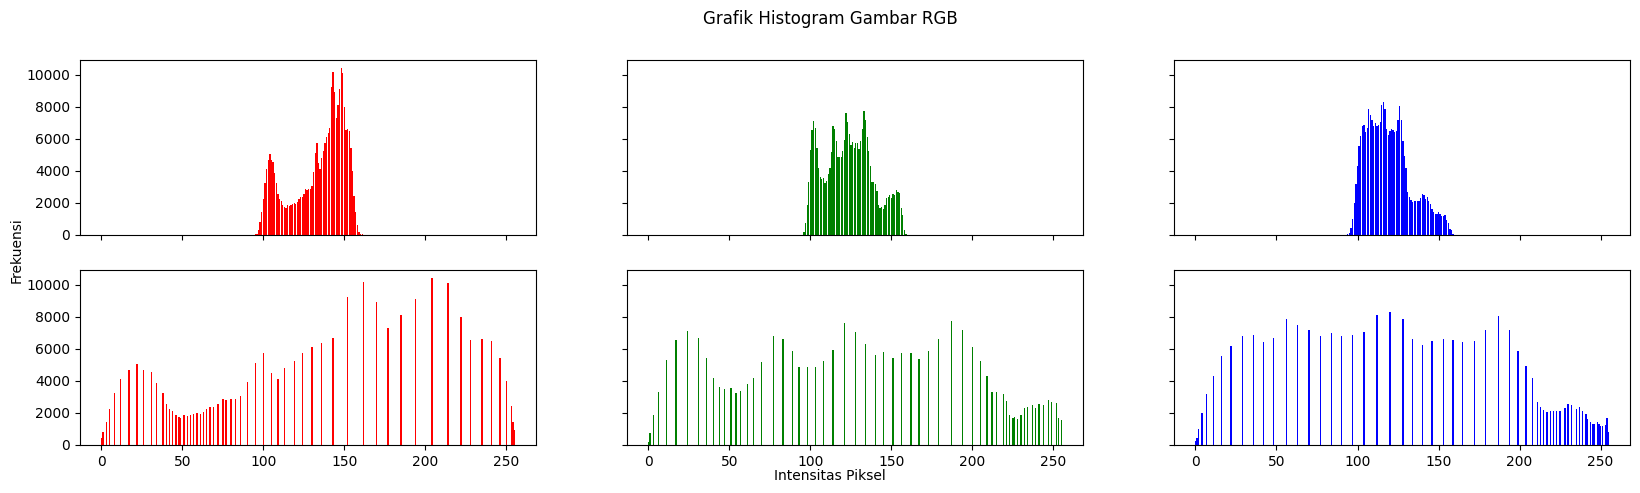

In [16]:
# Memisahkan gambar menjadi saluran warna
channel_list = cv.split(original_image)
equalized_channels = []

# Equalisasi setiap saluran warna: Merah, Hijau, Biru
for channel, color in zip(channel_list, ["Red", "Green", "Blue"]):
    equalized_channel = cv.equalizeHist(channel)
    equalized_channels.append(equalized_channel)

# Menggabungkan saluran yang sudah diseimbangkani
equalized_image = cv.merge(equalized_channels)

# Menghitung histogram untuk gambar asli dan gambar yang sudah diseimbangkan
original_histogram = calculate_histogram(original_image)
equalized_histogram = calculate_histogram(equalized_image)

# Menampilkan gambar asli dan gambar yang sudah diseimbangkan berdampingan
final_combined_image = cv.hconcat((original_image, equalized_image))
cv2_imshow(final_combined_image)

# Memeriksa apakah gambar adalah grayscale atau berwarna
if original_image.shape[-1] == 1:
    # Gambar grayscale
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Grafik Histogram Gambar Grayscale')
    fig.text(0.09, 0.5, 'Frekuensi', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Piksel', ha='center')
    axs[0].bar(intensity_values, original_histogram[0], color='gray')
    axs[1].bar(intensity_values, equalized_histogram[0], color='gray')
else:
    # Gambar berwarna
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Grafik Histogram Gambar RGB')
    fig.text(0.09, 0.5, 'Frekuensi', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Piksel', ha='center')
    for c in range(3):
        axs[0, c].bar(intensity_values, original_histogram[2 - c], color=['red', 'green', 'blue'][c])
        axs[1, c].bar(intensity_values, equalized_histogram[2 - c], color=['red', 'green', 'blue'][c])

**16 JUTA WARNA KE 8 WARNA**

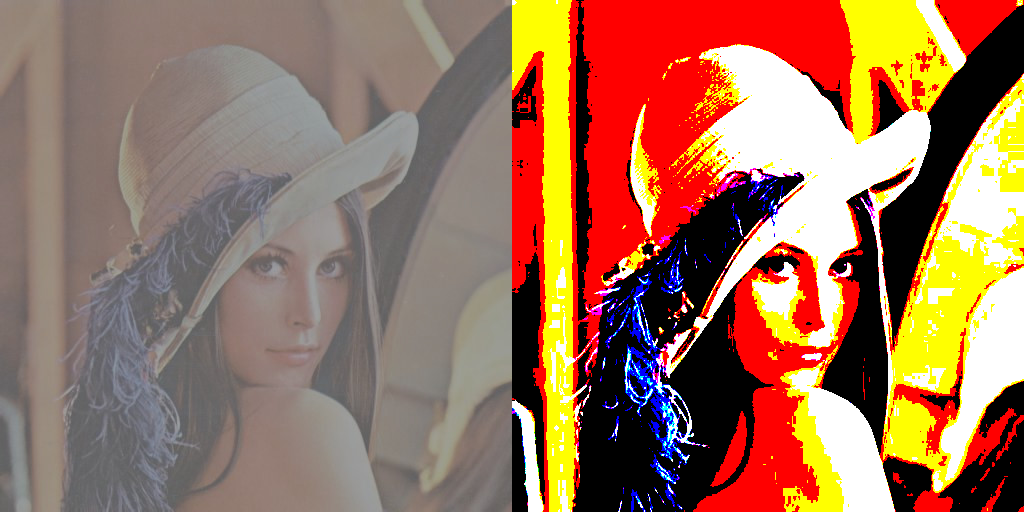

In [19]:
def find_nearest_color(r, g, b):
    pValue = 0  # Variabel untuk menyimpan indeks warna terdekat
    min_distance = 255*255 + 255*255 + 255*255 + 1  # Inisialisasi jarak minimum yang besar

    # Palet warna yang tersedia dalam bentuk RGB
    color_palette = [
        [0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0],
        [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]
    ]

    # Iterasi melalui palet warna
    for i in range(len(color_palette)):
        r_diff = r - color_palette[i][0]  # Selisih komponen merah
        g_diff = g - color_palette[i][1]  # Selisih komponen hijau
        b_diff = b - color_palette[i][2]  # Selisih komponen biru

        # Menghitung jarak Euclidean kuadrat
        distance = r_diff*r_diff + g_diff*g_diff + b_diff*b_diff

        # Memeriksa jika jarak lebih kecil dari jarak minimum sebelumnya
        if (distance < min_distance):
            min_distance = distance  # Perbarui jarak minimum
            pValue = i  # Perbarui indeks warna terdekat

    return pValue

# Palet warna yang tersedia dalam bentuk RGB
color_palette = [
    [0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0],
    [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]
]

# Konversi gambar ke format RGB
img_16 = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)

# Buat array kosong untuk gambar hasil dengan format 8-bit
img_8 = np.zeros(img_16.shape, img_16.dtype)

# Iterasi setiap piksel dalam gambar 16-bit
for y in range(0, img_16.shape[0]):
    for x in range(0, img_16.shape[1]):
        nearest_color_index = find_nearest_color(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
        img_8[y, x] = color_palette[nearest_color_index]

# Konversi kembali gambar hasil ke format BGR
img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)

# Menggabungkan kedua gambar untuk ditampilkan
final_frame = cv.hconcat((img_16, img_8))

# Menampilkan gambar hasil
cv2_imshow(final_frame)

**DITHERING FLOYD-STEINBERG**

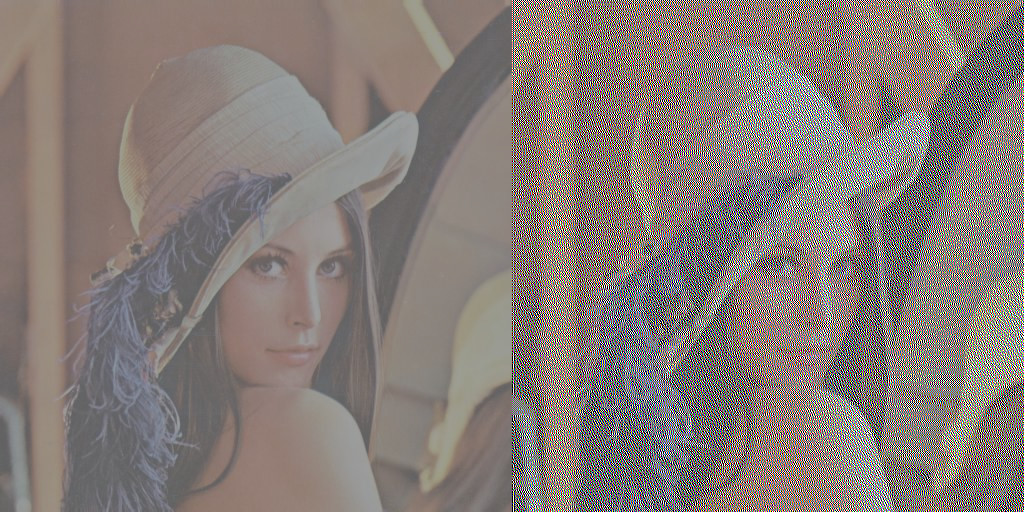

In [22]:
# Konversi gambar awal menjadi tipe data float
img_float = np.float64(original_image)

# Dapatkan dimensi gambar (tinggi, lebar, jumlah saluran warna)
height, width, channels = original_image.shape

# Iterasi melalui setiap piksel gambar
for y in range(height):
    for x in range(width):
        for c in range(channels):
            old_value = img_float[y, x, c]

            # Hitung nilai baru dengan melakukan dithering (rounding)
            new_value = round(old_value / 255) * 255
            img_float[y, x, c] = new_value

            error = old_value - new_value

            # Propagasi kesalahan ke piksel-piksel tetangga
            if x < width - 1:
                img_float[y, x + 1, c] += error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img_float[y + 1, x - 1, c] += error * 3 / 16
                img_float[y + 1, x, c] += error * 5 / 16
                if x < width - 1:
                    img_float[y + 1, x + 1, c] += error * 1 / 16

# Konversi gambar hasil kembali ke tipe data uint8
output_img = np.uint8(img_float)

# Menggabungkan gambar asli dengan gambar hasil
final_frame = cv.hconcat((original_image, output_img))

# Menampilkan gambar hasil
cv2_imshow(final_frame)

**GRAYSACLE AND  DITHERING FLOYD-STEINBERG**

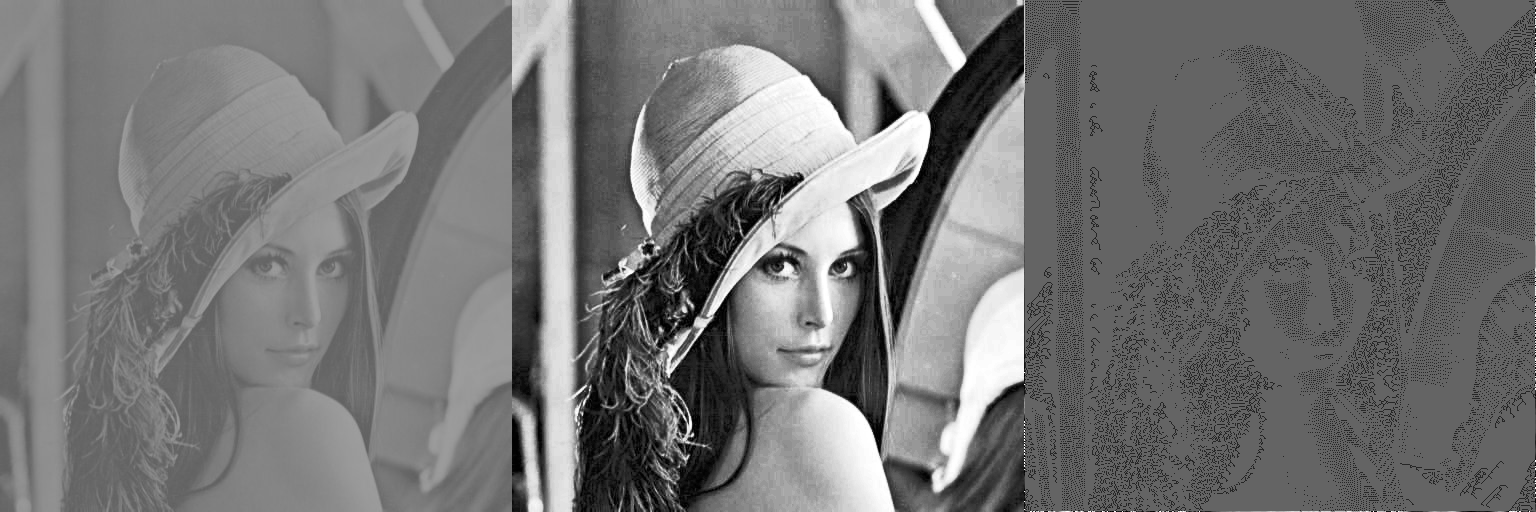

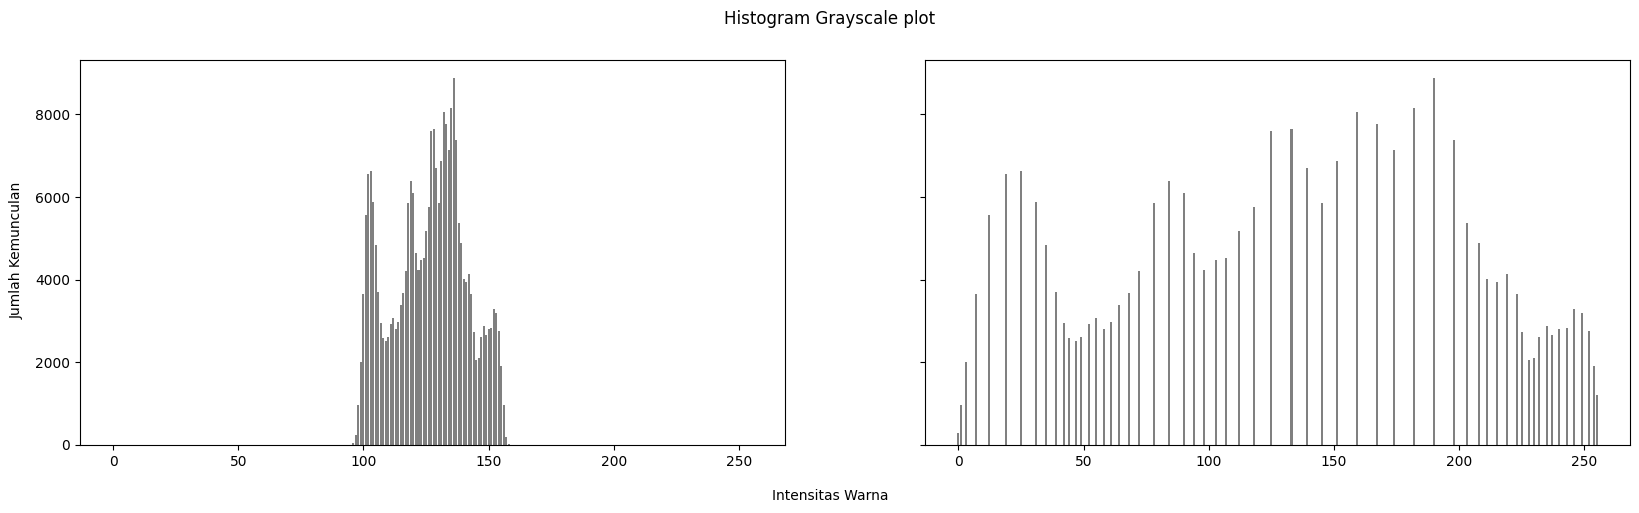

In [35]:
# Membaca gambar grayscale
gray_original = cv.imread('/content/drive/MyDrive/dataset/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

# Ekualisasi histogram pada gambar grayscale
equalized_image = cv.equalizeHist(gray_original)

# Inisialisasi gambar hasil dithering dengan salinan dari gambar ekualisasi
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

# Ambang (threshold) untuk dithering
threshold = 230

# Proses dithering Floyd-Steinberg
for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 3 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

# Menghitung histogram gambar asli dan histogram gambar yang telah di-ekualisasi
gray_hist = cv.calcHist([gray_original], [0], None, [256], [0, 256])
histo_equalized = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram gambar asli dan histogram gambar yang telah di-ekualisasi
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), gray_hist[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')

# Menggabungkan gambar asli, gambar yang telah di-ekualisasi, dan gambar hasil dithering
final_frame = cv.hconcat((gray_original, equalized_image, dithered_image))

# Menampilkan gambar hasil
cv2_imshow(final_frame)
